In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


In [2]:
csv_file = 'cuhk_embeddings/exclude_one_image_per_set_exp_results.csv'
df = pd.read_csv(csv_file)

print(df.head())
print(df.dtypes)


  similarity_metric     collection     model  top_k  accuracy
0            cosine  ViT_B_32_CUHK  ViT-B-32      1  0.212468
1            cosine  ViT_B_32_CUHK  ViT-B-32      2  0.258906
2            cosine  ViT_B_32_CUHK  ViT-B-32      5  0.315522
3            cosine  ViT_B_32_CUHK  ViT-B-32     10  0.372137
4            cosine  ViT_B_32_CUHK  ViT-B-32     15  0.418575
similarity_metric     object
collection            object
model                 object
top_k                  int64
accuracy             float64
dtype: object


In [3]:
df_ = df[df["top_k"] == 20]
grouped = df_.groupby(["similarity_metric", "model"])['accuracy'].agg(mean_accuracy=('mean'), std=('std'))
grouped = grouped.sort_values(by='mean_accuracy', ascending=False) # type: ignore
grouped

mean_accuracy  \
similarity_metric model                                                            
cosine            hf-hub:apple/DFN5B-CLIP-ViT-H-14-384                  0.803197   
                  google/siglip-so400m-patch14-384                      0.801874   
                  google/siglip-base-patch16-224                        0.724714   
                  hf-hub:laion/CLIP-ViT-bigG-14-laion2B-39B-b160k       0.549098   
                  ViT-B-32                                              0.440458   
euclidean         PDNA                                                  0.416349   
cosine            ViT-bigG-14-quickgelu                                 0.396831   

                                                                        std  
similarity_metric model                                                      
cosine            hf-hub:apple/DFN5B-CLIP-ViT-H-14-384             0.005994  
                  google/siglip-so400m-patch14-384                 0.004780  
                  google/siglip-base-patch16-224                   0.008255  
                  hf-hub:laion/CLIP-ViT-bigG-14-laion2B-39B-b160k  0.008254  
                  ViT-B-32                                         0.012115  
euclidean         PDNA                                             0.005674  
cosine            ViT-bigG-14-quickgelu                            0.007488

In [4]:
grouped = df.groupby(["similarity_metric", "model", "top_k"])['accuracy'].agg(mean_accuracy=('mean'), std=('std'))
grouped = grouped.sort_values(by=['similarity_metric', 'top_k', 'mean_accuracy'], ascending=False) # type: ignore
grouped


mean_accuracy  \
similarity_metric model                                           top_k                  
euclidean         PDNA                                            50          0.513931   
                                                                  40          0.487595   
                                                                  30          0.456234   
                                                                  25          0.437087   
                                                                  20          0.416349   
                                                                  15          0.389048   
                                                                  10          0.359627   
                                                                  5           0.309637   
                                                                  2           0.251272   
                                                                  1           0.209553   
cosine            hf-hub:apple/DFN5B-CLIP-ViT-H-14-384            50          0.870674   
                  google/siglip-so400m-patch14-384                50          0.861832   
                  google/siglip-base-patch16-224                  50          0.799936   
                  hf-hub:laion/CLIP-ViT-bigG-14-laion2B-39B-b160k 50          0.648728   
                  ViT-B-32                                        50          0.536768   
                  ViT-bigG-14-quickgelu                           50          0.498092   
                  hf-hub:apple/DFN5B-CLIP-ViT-H-14-384            40          0.857316   
                  google/siglip-so400m-patch14-384                40          0.845738   
                  google/siglip-base-patch16-224                  40          0.778880   
                  hf-hub:laion/CLIP-ViT-bigG-14-laion2B-39B-b160k 40          0.624873   
                  ViT-B-32                                        40          0.514758   
                  ViT-bigG-14-quickgelu                           40          0.470449   
                  hf-hub:apple/DFN5B-CLIP-ViT-H-14-384            30          0.835242   
                  google/siglip-so400m-patch14-384                30          0.828053   
                  google/siglip-base-patch16-224                  30          0.756043   
                  hf-hub:laion/CLIP-ViT-bigG-14-laion2B-39B-b160k 30          0.596501   
                  ViT-B-32                                        30          0.479071   
                  ViT-bigG-14-quickgelu                           30          0.436676   
                  hf-hub:apple/DFN5B-CLIP-ViT-H-14-384            25          0.818893   
                  google/siglip-so400m-patch14-384                25          0.814377   
                  google/siglip-base-patch16-224                  25          0.737150   
                  hf-hub:laion/CLIP-ViT-bigG-14-laion2B-39B-b160k 25          0.577926   
                  ViT-B-32                                        25          0.460814   
                  ViT-bigG-14-quickgelu                           25          0.416435   
                  hf-hub:apple/DFN5B-CLIP-ViT-H-14-384            20          0.803197   
                  google/siglip-so400m-patch14-384                20          0.801874   
                  google/siglip-base-patch16-224                  20          0.724714   
                  hf-hub:laion/CLIP-ViT-bigG-14-laion2B-39B-b160k 20          0.549098   
                  ViT-B-32                                        20          0.440458   
                  ViT-bigG-14-quickgelu                           20          0.396831   
                  google/siglip-so400m-patch14-384                15          0.781402   
                  hf-hub:apple/DFN5B-CLIP-ViT-H-14-384            15          0.778745   
                  google/siglip-base-patch16-224                  15          0.702555   
                  hf-hu

                                             model  top_k  mean_accuracy  \
0             hf-hub:apple/DFN5B-CLIP-ViT-H-14-384     50       0.870674   
1                 google/siglip-so400m-patch14-384     50       0.861832   
2                   google/siglip-base-patch16-224     50       0.799936   
3  hf-hub:laion/CLIP-ViT-bigG-14-laion2B-39B-b160k     50       0.648728   
4                                         ViT-B-32     50       0.536768   

        std  
0  0.003044  
1  0.006423  
2  0.005739  
3  0.009501  
4  0.007369  


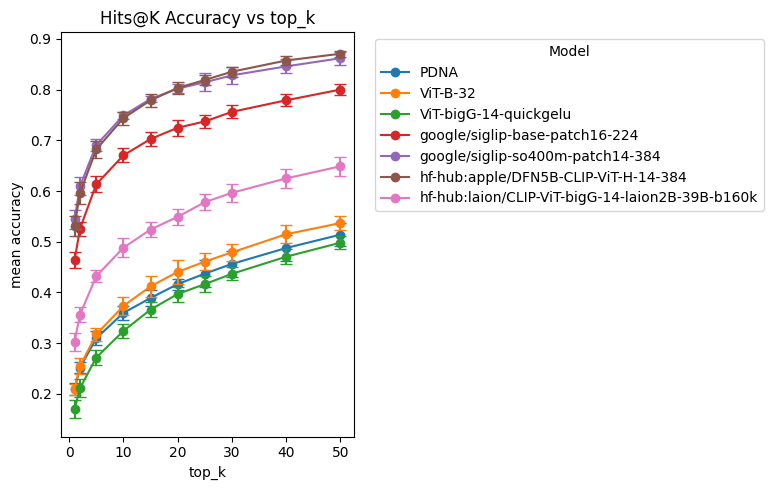

In [8]:
grouped = df.groupby([ "model", "top_k"])["accuracy"].agg(
    mean_accuracy=("mean"), std=("std")
)
grouped = grouped.sort_values(by=[ "top_k", "mean_accuracy"], ascending=False)  # type: ignore
grouped = grouped.reset_index()
print(grouped.head())
df_ = grouped

# Create the plot
fig, ax = plt.subplots(figsize=(8, 5))

# Group by model and plot each with a different color
for model, group in df_.groupby("model"):
    # Ensure the group is sorted by top_k
    group_sorted = group.sort_values("top_k")
    line, = ax.plot(group_sorted["top_k"], group_sorted["mean_accuracy"], marker='o', label=model)
    # Optionally, include error bars for std deviation:
    # ax.errorbar(
    #     group_sorted["top_k"], 
    #     group_sorted["mean_accuracy"],
    #     yerr=group_sorted["std"],
    #     fmt='none', 
    #     capsize=4, 
    #     color=ax.lines[-1].get_color()
    # )
    # Plot error bars corresponding to the 95% confidence interval
    ci = 1.96 * group_sorted["std"]
    ax.errorbar(
        group_sorted["top_k"],
        group_sorted["mean_accuracy"],
        yerr=ci,
        fmt='none',
        capsize=4,
        color=line.get_color()
    )

# Set axis labels and legend
ax.set_xlabel("top_k")
ax.set_ylabel("mean accuracy")
ax.set_title("Hits@K Accuracy vs top_k")
ax.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()